In [1]:
import pandas as pd
import glob
import matplotlib.pyplot as plot
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

In [2]:
root = "./cleaned_datasets"

In [3]:
def readFolder(folder, time, col):
    readFolder = f"{root}/{folder}/{time}/*.csv"
    fileList = glob.glob(readFolder)
    myDict = {}
    for file in fileList:
        city = file.split("/")[-1].split(".")[0]
        mdf = pd.read_csv(file)
#         print(mdf.columns)
        myDict[city] = list(mdf[col])
    return myDict

In [4]:
preSentDict = readFolder("SentimentIndex", "pre", "sentimentRatio")

In [33]:
prePetrolDict = readFolder("diesel", "pre", "rate")

In [9]:
def getCorrMat(d1, d2, limit):
    cities = list(d1.keys())
    corrs = []
    for city in cities:
        print(city)
        corr, _ = pearsonr(d1[city][:limit], d2[city])
        corrs.append(corr)
    return corrs, cities

In [35]:
cMat, cities = getCorrMat(preSentDict, prePetrolDict, 13)

Hyderabad
Delhi
Chennai
Mumbai
Bangalore


In [36]:
np.mean(cMat)

-0.2916362071030322

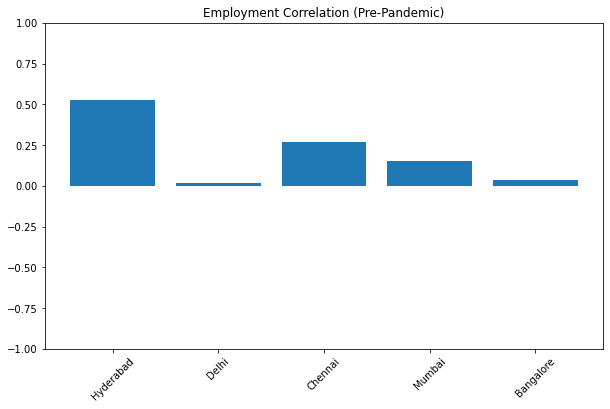

In [22]:
plt.figure(figsize=(10, 6))
plt.title("Employment Correlation (Pre-Pandemic)")
plt.bar(np.arange(len(cMat)), cMat)
plt.xticks(np.arange(len(cMat)), cities, rotation=45)
plt.ylim(-1, 1)
plt.savefig("./viz/employment_pre.jpg")
plt.show()

In [38]:
postSentDict = readFolder("SentimentIndex", "post", "sentimentRatio")
postPetrolDict = readFolder("diesel", "post", "rate")
del postSentDict["Kolkata"]

In [ ]:
petro

In [43]:
len(postPetrolDict["Hyderabad"])

12

In [44]:
cMat, cities = getCorrMat(postSentDict, postPetrolDict, 12)

Hyderabad
Delhi
Chennai
Mumbai
Bangalore


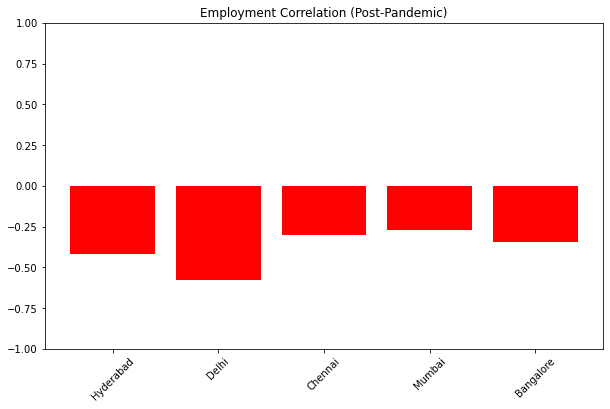

In [27]:
plt.figure(figsize=(10, 6))
plt.title("Employment Correlation (Post-Pandemic)")
plt.bar(np.arange(len(cMat)), cMat, color="red")
plt.xticks(np.arange(len(cMat)), cities, rotation=45)
plt.ylim(-1, 1)
plt.savefig("./viz/employment_post.jpg")
plt.show()

In [45]:
np.mean(cMat)

0.31251717270054125